In [1]:

import pandas as pd
import plotly.express as px
import folium
import numpy as np 
import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
car_df=pd.read_csv("Cars Mock Data.csv")

In [3]:
car_df.shape

(10000, 20)

In [4]:
car_df.head()

Make    Model    Nickname Car Gender Buyer Gender  Buyer Age  \
0  Suzuki   Vitara  Philippine     Female       Female         51   
1   Honda    S2000      Henrik       Male         Male         30   
2     BMW       Z4      Lebbie       Male       Female         54   
3  Toyota   Tacoma    Jefferey     Female         Male         68   
4    Ford  Festiva     Glendon     Female         Male         70   

        Buzzword   Country             City  Dealer Latitude  \
0  User-friendly   Belgium        Antwerpen        51.247239   
1      analyzing     China            Jinhu        33.025433   
2       software     China             Gemo        30.916207   
3     monitoring  Portugal  Queluz de Baixo        38.745168   
4       Sharable    Latvia         Jaunpils        56.729980   

   Dealer Longitude    Color  New Car Purchase Date  Sale Price  Discount  \
0          4.440346   Yellow    False    19/07/2009    54806.14    0.2467   
1        119.020584  Crimson    False    26/10/2015    51826.30    0.3147   
2        121.677640    Khaki    False    28/03/2010    82929.14    0.5414   
3         -9.267087     Puce    False    07/05/2008    56928.66    0.0850   
4         23.016588   Yellow    False    01/06/2008    77201.26    0.1642   

   Resell Price  5-yr Depreciation  Top Speed  0-60 Time  
0      33858.32               0.13      200.9       11.5  
1       2989.28               0.02      158.5        8.8  
2      35049.16               0.24      149.5       14.4  
3       8236.15               0.20      153.3       11.5  
4      32765.76               0.18      122.0       14.9

In [5]:
car_df.tail()

Make        Model  Nickname Car Gender Buyer Gender  Buyer Age  \
9995    Mazda      Tribute    Cooper       Male         Male         44   
9996      GMC  Sierra 2500       Dud       Male         Male         40   
9997  Mercury      Mariner   Chariot       Male         Male         37   
9998   Daewoo      Leganza     Dynah     Female       Female         21   
9999   Toyota      Sequoia  Zedekiah     Female         Male         21   

        Buzzword      Country             City  Dealer Latitude  \
9995    hardware     Pakistan  Chishtiān Mandi        29.919386   
9996    Enhanced   Costa Rica          Ángeles        10.075000   
9997  monitoring       Poland        Dąbrowice        52.311923   
9998    cohesive  Philippines         Villasis        15.901640   
9999   analyzing  Philippines            Basud        14.048167   

      Dealer Longitude Color  New Car Purchase Date  Sale Price  Discount  \
9995         73.074787  Pink    False    05/01/2020    58580.65    0.1611   
9996        -84.241523  Puce    False    28/12/2005    75229.74    0.2691   
9997         19.084965  Blue    False    08/03/2013    34755.44    0.2493   
9998        120.587828  Teal     True    21/02/2008    98725.42    0.4654   
9999        122.955697  Pink    False    16/12/2017    96769.78    0.5446   

      Resell Price  5-yr Depreciation  Top Speed  0-60 Time  
9995      42640.82               0.14      245.8        8.0  
9996      21115.58               0.11      147.4       12.3  
9997       2731.25               0.12      198.1       11.8  
9998      18718.58               0.04      206.7       12.2  
9999       4545.95               0.07      242.1        3.2

In [6]:
car_df.describe()

Buyer Age  Dealer Latitude  Dealer Longitude    Sale Price  \
count  10000.000000     10000.000000      10000.000000  10000.000000   
mean      47.762100        24.820088         43.878248  55350.799983   
std       16.139862        24.585875         70.985736  25888.683650   
min       20.000000       -53.163833       -178.165510  10003.760000   
25%       34.000000         7.442378          4.400811  33254.517500   
50%       48.000000        31.049994         38.156212  55629.770000   
75%       62.000000        44.351935        112.252192  77770.950000   
max       75.000000        71.963470        179.350460  99997.650000   

           Discount  Resell Price  5-yr Depreciation     Top Speed  \
count  10000.000000  10000.000000       10000.000000  10000.000000   
mean       0.350310  25873.349305           0.130596    184.903480   
std        0.201970  13844.768112           0.069593     37.528707   
min        0.000100   2000.840000           0.010000    120.000000   
25%        0.177500  13853.507500           0.070000    152.500000   
50%        0.350900  25967.430000           0.130000    185.500000   
75%        0.522625  37875.417500           0.190000    217.700000   
max        0.700000  49997.050000           0.250000    250.000000   

          0-60 Time  
count  10000.000000  
mean       8.471420  
std        3.742613  
min        2.000000  
25%        5.200000  
50%        8.500000  
75%       11.700000  
max       15.000000

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               10000 non-null  object 
 1   Model              10000 non-null  object 
 2   Nickname           10000 non-null  object 
 3   Car Gender         10000 non-null  object 
 4   Buyer Gender       10000 non-null  object 
 5   Buyer Age          10000 non-null  int64  
 6   Buzzword           10000 non-null  object 
 7   Country            10000 non-null  object 
 8   City               10000 non-null  object 
 9   Dealer Latitude    10000 non-null  float64
 10  Dealer Longitude   10000 non-null  float64
 11  Color              10000 non-null  object 
 12  New Car            10000 non-null  bool   
 13  Purchase Date      10000 non-null  object 
 14  Sale Price         10000 non-null  float64
 15  Discount           10000 non-null  float64
 16  Resell Price       1000

In [8]:
car_df.sample(5)

Make         Model   Nickname Car Gender Buyer Gender  Buyer Age  \
4208   Infiniti            QX  Mellicent       Male       Female         47   
1411     Toyota     T100 Xtra     Stinky       Male         Male         66   
9857        GMC           EV1     Trevor     Female         Male         42   
3893      Mazda       Familia       Kile       Male         Male         27   
1921  Chevrolet  Express 2500      Lamar       Male         Male         64   

           Buzzword         Country          City  Dealer Latitude  \
4208        Organic       Indonesia  Kawangu Satu        -9.692374   
1411   Synchronised  Czech Republic      Humpolec        49.180964   
9857         Robust       Indonesia      Wolowiro        -8.778952   
3893  demand-driven           China         Hezhi        39.105787   
1921   Face to face        Honduras     La Jutosa        15.649751   

      Dealer Longitude       Color  New Car Purchase Date  Sale Price  \
4208        120.332240        Puce    False    10/02/2010    81821.59   
1411         13.554856        Mauv     True    27/04/2013    45129.71   
9857        122.009864  Aquamarine     True    11/10/2007    25469.30   
3893        111.862117   Turquoise     True    14/06/2019    80210.97   
1921        -87.997164      Yellow     True    11/01/2019    73119.91   

      Discount  Resell Price  5-yr Depreciation  Top Speed  0-60 Time  
4208    0.4496      34097.38               0.21      141.3        9.3  
1411    0.0430      12228.17               0.24      239.7        9.5  
9857    0.5278      29659.80               0.15      126.6        3.1  
3893    0.6841      30163.47               0.23      224.1       14.4  
1921    0.1970       7856.42               0.21      174.4        3.9

In [9]:
car_df.columns = car_df.columns.str.replace(' ','_')

In [10]:
car_df.head()

Make    Model    Nickname Car_Gender Buyer_Gender  Buyer_Age  \
0  Suzuki   Vitara  Philippine     Female       Female         51   
1   Honda    S2000      Henrik       Male         Male         30   
2     BMW       Z4      Lebbie       Male       Female         54   
3  Toyota   Tacoma    Jefferey     Female         Male         68   
4    Ford  Festiva     Glendon     Female         Male         70   

        Buzzword   Country             City  Dealer_Latitude  \
0  User-friendly   Belgium        Antwerpen        51.247239   
1      analyzing     China            Jinhu        33.025433   
2       software     China             Gemo        30.916207   
3     monitoring  Portugal  Queluz de Baixo        38.745168   
4       Sharable    Latvia         Jaunpils        56.729980   

   Dealer_Longitude    Color  New_Car Purchase_Date  Sale_Price  Discount  \
0          4.440346   Yellow    False    19/07/2009    54806.14    0.2467   
1        119.020584  Crimson    False    26/10/2015    51826.30    0.3147   
2        121.677640    Khaki    False    28/03/2010    82929.14    0.5414   
3         -9.267087     Puce    False    07/05/2008    56928.66    0.0850   
4         23.016588   Yellow    False    01/06/2008    77201.26    0.1642   

   Resell_Price  5-yr_Depreciation  Top_Speed  0-60_Time  
0      33858.32               0.13      200.9       11.5  
1       2989.28               0.02      158.5        8.8  
2      35049.16               0.24      149.5       14.4  
3       8236.15               0.20      153.3       11.5  
4      32765.76               0.18      122.0       14.9

# We will Convert datatypes of objects into respective datatypes

In [11]:
car_df.describe(include = 'O')

Make     Model Nickname Car_Gender Buyer_Gender  Buzzword Country  \
count   10000     10000    10000      10000        10000     10000   10000   
unique     75       957     5721          2            2       305     199   
top      Ford  Corvette     Chad     Female       Female  solution   China   
freq      864        70        8       5035         5052        53    1849   

             City  Color Purchase_Date  
count       10000  10000         10000  
unique       8213     19          5264  
top     Stockholm   Mauv    07/10/2016  
freq           24    577             9

In [12]:
car_df.Country.unique()

array(['Belgium', 'China', 'Portugal', 'Latvia', 'Mexico', 'Japan',
       'Russia', 'Luxembourg', 'Cyprus', 'Brazil', 'Philippines',
       'Paraguay', 'Indonesia', 'Togo', 'Palestinian Territory', 'Iran',
       'Hong Kong', 'Bangladesh', 'Ecuador', 'Afghanistan', 'Kazakhstan',
       'United States', 'Poland', 'France', 'Vietnam', 'Bhutan', 'Serbia',
       'Sweden', 'Maldives', 'Argentina', 'Czech Republic', 'Mozambique',
       'Colombia', 'Costa Rica', 'Morocco', 'Peru', 'Slovenia', 'Libya',
       'Greece', 'South Korea', 'Denmark', 'Finland', 'Honduras',
       'Bulgaria', 'Kiribati', 'South Africa', 'Chile', 'Kosovo',
       'Pakistan', 'Kuwait', 'Ukraine', 'Liberia', 'Thailand', 'Canada',
       'Estonia', 'Nigeria', 'French Guiana', 'Armenia', 'Sudan', 'Kenya',
       'Senegal', 'Belarus', 'Mongolia', 'Angola', 'Netherlands',
       'Azerbaijan', 'Niger', 'El Salvador', 'Guatemala', 'Venezuela',
       'Israel', 'Malaysia', 'Chad', 'Germany', 'Jamaica', 'Norway',
       'Ire

# Cleaning of Data 

In [13]:
car_df.dtypes

Make                  object
Model                 object
Nickname              object
Car_Gender            object
Buyer_Gender          object
Buyer_Age              int64
Buzzword              object
Country               object
City                  object
Dealer_Latitude      float64
Dealer_Longitude     float64
Color                 object
New_Car                 bool
Purchase_Date         object
Sale_Price           float64
Discount             float64
Resell_Price         float64
5-yr_Depreciation    float64
Top_Speed            float64
0-60_Time            float64
dtype: object

# We are changing the datatype of Purchase Date to Date datatype 

In [15]:
car_df['Purchase_Date'] = pd.to_datetime(car_df["Purchase_Date"]) 

In [16]:
car_df.dtypes

Make                         object
Model                        object
Nickname                     object
Car_Gender                   object
Buyer_Gender                 object
Buyer_Age                     int64
Buzzword                     object
Country                      object
City                         object
Dealer_Latitude             float64
Dealer_Longitude            float64
Color                        object
New_Car                        bool
Purchase_Date        datetime64[ns]
Sale_Price                  float64
Discount                    float64
Resell_Price                float64
5-yr_Depreciation           float64
Top_Speed                   float64
0-60_Time                   float64
dtype: object

# In our Dataset we dont need some of the coloumns such as  Car_Gender, Nickname because it is not depicting anything from our dataset.

In [17]:
car_df.drop('Car_Gender', inplace=True, axis = 1)

In [18]:
car_df.drop('Nickname', inplace=True, axis = 1)

In [19]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Make               10000 non-null  object        
 1   Model              10000 non-null  object        
 2   Buyer_Gender       10000 non-null  object        
 3   Buyer_Age          10000 non-null  int64         
 4   Buzzword           10000 non-null  object        
 5   Country            10000 non-null  object        
 6   City               10000 non-null  object        
 7   Dealer_Latitude    10000 non-null  float64       
 8   Dealer_Longitude   10000 non-null  float64       
 9   Color              10000 non-null  object        
 10  New_Car            10000 non-null  bool          
 11  Purchase_Date      10000 non-null  datetime64[ns]
 12  Sale_Price         10000 non-null  float64       
 13  Discount           10000 non-null  float64       
 14  Resell_

In [20]:
car_df.isna().sum()

Make                 0
Model                0
Buyer_Gender         0
Buyer_Age            0
Buzzword             0
Country              0
City                 0
Dealer_Latitude      0
Dealer_Longitude     0
Color                0
New_Car              0
Purchase_Date        0
Sale_Price           0
Discount             0
Resell_Price         0
5-yr_Depreciation    0
Top_Speed            0
0-60_Time            0
dtype: int64

In [21]:
car_df.duplicated().sum()

0

In [22]:
car_df.isnull().sum().to_frame()

0
Make               0
Model              0
Buyer_Gender       0
Buyer_Age          0
Buzzword           0
Country            0
City               0
Dealer_Latitude    0
Dealer_Longitude   0
Color              0
New_Car            0
Purchase_Date      0
Sale_Price         0
Discount           0
Resell_Price       0
5-yr_Depreciation  0
Top_Speed          0
0-60_Time          0

In [23]:
car_df.to_csv("car_data_cleaned.csv")

# No Null values

# We are checking coorelation between Top Speed and 0-60 Time (pickup)

In [24]:
print(np.corrcoef(car_df["Top_Speed"],car_df["0-60_Time"]))

[[1.         0.01091749]
 [0.01091749 1.        ]]


# corelation between Sale Price and Resell Price

In [25]:
print(np.corrcoef(car_df["Sale_Price"],car_df["Resell_Price"]))

[[ 1.         -0.01132975]
 [-0.01132975  1.        ]]


In [26]:
print(np.corrcoef(car_df["5-yr_Depreciation"],car_df["Resell_Price"]))

[[1.         0.00122363]
 [0.00122363 1.        ]]


In [27]:
car_corr = car_df.corr()
round(car_corr,3)

Buyer_Age  Dealer_Latitude  Dealer_Longitude  New_Car  \
Buyer_Age              1.000            0.011            -0.010    0.002   
Dealer_Latitude        0.011            1.000             0.019   -0.005   
Dealer_Longitude      -0.010            0.019             1.000   -0.002   
New_Car                0.002           -0.005            -0.002    1.000   
Sale_Price            -0.002           -0.013             0.016   -0.000   
Discount               0.001           -0.007             0.009   -0.002   
Resell_Price           0.001           -0.004            -0.009    0.015   
5-yr_Depreciation      0.010            0.005             0.001   -0.018   
Top_Speed             -0.018           -0.004            -0.007    0.005   
0-60_Time             -0.009            0.016             0.004   -0.005   

                   Sale_Price  Discount  Resell_Price  5-yr_Depreciation  \
Buyer_Age              -0.002     0.001         0.001              0.010   
Dealer_Latitude        -0.013    -0.007        -0.004              0.005   
Dealer_Longitude        0.016     0.009        -0.009              0.001   
New_Car                -0.000    -0.002         0.015             -0.018   
Sale_Price              1.000    -0.010        -0.011              0.004   
Discount               -0.010     1.000         0.011              0.008   
Resell_Price           -0.011     0.011         1.000              0.001   
5-yr_Depreciation       0.004     0.008         0.001              1.000   
Top_Speed              -0.013    -0.001        -0.016             -0.001   
0-60_Time               0.021    -0.007         0.010              0.017   

                   Top_Speed  0-60_Time  
Buyer_Age             -0.018     -0.009  
Dealer_Latitude       -0.004      0.016  
Dealer_Longitude      -0.007      0.004  
New_Car                0.005     -0.005  
Sale_Price            -0.013      0.021  
Discount              -0.001     -0.007  
Resell_Price          -0.016      0.010  
5-yr_Depreciation     -0.001      0.017  
Top_Speed              1.000      0.011  
0-60_Time              0.011      1.000

In [28]:
car_df.groupby(["Make","Model"]).agg(Mean_Sale_price = ("Sale_Price", "mean"))

Mean_Sale_price
Make  Model                   
Acura CL          53259.503333
      Integra     48894.990714
      Legend      65130.191111
      MDX         55372.939412
      NSX         49679.301765
...                        ...
Volvo V70         69192.369333
      V90         65042.455000
      XC60        56225.590000
      XC70        63357.126667
      XC90        53922.883529

[989 rows x 1 columns]

In [29]:
car_df_mean = car_df.groupby(["Make"]).agg(Mean_Sale_price_Make = ("Sale_Price", "mean"),Mean_Resell_price_Make = ("Resell_Price", "mean"))

In [30]:
car_df.groupby(["Make"]).agg(Mean_Resell_price_Make = ("Resell_Price", "mean"))

Mean_Resell_price_Make
Make                                
Acura                   26898.640423
Alfa Romeo              33532.719091
Aptera                  33632.422500
Aston Martin            22602.120820
Audi                    27763.395088
...                              ...
Suzuki                  28731.977033
Tesla                   17163.160000
Toyota                  25410.678108
Volkswagen              25860.561781
Volvo                   26222.216000

[75 rows x 1 columns]

In [31]:
car_df_mean = car_df_mean.rename_axis(None,axis=1)

In [32]:
# to convert "make" into coloumns instead of index 
car_df_mean = car_df_mean.rename_axis('Make').reset_index()

In [33]:
car_df_mean

Make  Mean_Sale_price_Make  Mean_Resell_price_Make
0          Acura          55301.872394            26898.640423
1     Alfa Romeo          53958.793636            33532.719091
2         Aptera          65626.802500            33632.422500
3   Aston Martin          56729.934098            22602.120820
4           Audi          57550.239333            27763.395088
..           ...                   ...                     ...
70        Suzuki          55246.093132            28731.977033
71         Tesla          57060.865000            17163.160000
72        Toyota          54774.989032            25410.678108
73    Volkswagen          55862.681437            25860.561781
74         Volvo          57989.621789            26222.216000

[75 rows x 3 columns]

In [34]:
car_df_mean_testing = car_df.groupby(["Make"]).agg(Mean_Sale_price_Make = ("Sale_Price", "mean"),Mean_Resell_price_Make = ("Resell_Price", "mean"), Mean_Discount = ("Discount", "mean"), Mean_5_yr_Depreciation = ("5-yr_Depreciation" , "mean"), Mean_Top_speed = ("Top_Speed","mean"), Mean_0_60_Time = ("0-60_Time","mean") )

In [35]:
car_df_mean_testing = car_df_mean_testing.rename_axis('Make').reset_index()

In [36]:
car_df_mean_testing

Make  Mean_Sale_price_Make  Mean_Resell_price_Make  Mean_Discount  \
0          Acura          55301.872394            26898.640423       0.362600   
1     Alfa Romeo          53958.793636            33532.719091       0.402427   
2         Aptera          65626.802500            33632.422500       0.317900   
3   Aston Martin          56729.934098            22602.120820       0.382433   
4           Audi          57550.239333            27763.395088       0.373276   
..           ...                   ...                     ...            ...   
70        Suzuki          55246.093132            28731.977033       0.333085   
71         Tesla          57060.865000            17163.160000       0.209200   
72        Toyota          54774.989032            25410.678108       0.343981   
73    Volkswagen          55862.681437            25860.561781       0.360208   
74         Volvo          57989.621789            26222.216000       0.358494   

    Mean_5_yr_Depreciation  Mean_Top_speed  Mean_0_60_Time  
0                 0.130211      183.031690        8.559859  
1                 0.129091      195.727273       10.763636  
2                 0.070000      155.950000        9.100000  
3                 0.140984      188.911475        7.459016  
4                 0.136982      184.657544        8.664912  
..                     ...             ...             ...  
70                0.129505      184.178571        8.453846  
71                0.225000      215.900000        7.400000  
72                0.129775      187.866216        8.399324  
73                0.129094      185.536875        8.581563  
74                0.127368      185.624211        8.452632  

[75 rows x 7 columns]

In [37]:
car_df_New_Car = car_df.groupby(["New_Car"]).agg(Mean_Sale_price = ("Sale_Price", "mean"),Mean_Resell_price = ("Resell_Price", "mean"), Mean_Discount = ("Discount", "mean"), Mean_5_yr_Depreciation = ("5-yr_Depreciation" , "mean"), Mean_Top_speed = ("Top_Speed","mean"), Mean_0_60_Time = ("0-60_Time","mean") )

In [38]:
car_df_New_Car = car_df_New_Car.rename_axis("New_Car").reset_index()

In [39]:
car_df_New_Car

New_Car  Mean_Sale_price  Mean_Resell_price  Mean_Discount  \
0    False     55359.772149       25658.106604       0.350692   
1     True     55342.099968       26082.063077       0.349939   

   Mean_5_yr_Depreciation  Mean_Top_speed  Mean_0_60_Time  
0                0.131859      184.698517        8.491814  
1                0.129372      185.102226        8.451645

# it can be ambigous 

In [40]:
car_df["New_Car"] == True

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Name: New_Car, Length: 10000, dtype: bool

In [41]:
car_df.iloc[9998] 

Make                              Daewoo
Model                            Leganza
Buyer_Gender                      Female
Buyer_Age                             21
Buzzword                        cohesive
Country                      Philippines
City                            Villasis
Dealer_Latitude                 15.90164
Dealer_Longitude              120.587828
Color                               Teal
New_Car                             True
Purchase_Date        2008-02-21 00:00:00
Sale_Price                      98725.42
Discount                          0.4654
Resell_Price                    18718.58
5-yr_Depreciation                   0.04
Top_Speed                          206.7
0-60_Time                           12.2
Name: 9998, dtype: object

In [42]:
print(np.corrcoef(car_df_mean["Mean_Sale_price_Make"],car_df_mean["Mean_Resell_price_Make"]))

[[1.        0.3141593]
 [0.3141593 1.       ]]


In [43]:
plot_scatter = px.scatter(car_df_mean, x = "Mean_Sale_price_Make", y = "Mean_Resell_price_Make" , 
                          color = "Make", trendline = "ols", trendline_scope='overall',
                         labels={
                                     "Mean_Sale_price_Make": "<b>Mean Sale Price</b> ",
                                     "Mean_Resell_price_Make": "<b>Mean Resell Price</b>",
                                     "Make": "<b>Car Companies</b>"
                               })
plot_scatter.update_layout(title_text =" <b>Comparison of Sale and Resell price of different Car Companies </b>", 
                           title_x=0.9, legend_title_font_size=15, title_font_size=22)
plot_scatter.show()

In [42]:
car_df["Country"].nunique()

199

In [47]:
car_df["Make"].nunique()

75

In [48]:
car_df["Buzzword"].nunique()

305

In [49]:
car_df["Buyer_Age"].nunique()

56

In [50]:
print(sorted(car_df["Buyer_Age"].unique()))

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [44]:
bins = [-19,30,40,50,60,70,80]
label = ["20-30","31-40","41-50","51-60","61-70","71-80"]

count_binned = np.histogram(car_df['Buyer_Age'], bins=bins)[0].tolist()
df_age_range = pd.DataFrame.from_dict(dict(zip(label,count_binned)),orient='index').reset_index()
df_age_range.columns = ['Age_Group','Count']

In [45]:
df_age_range

Age_Group  Count
0     20-30   1694
1     31-40   1819
2     41-50   1810
3     51-60   1764
4     61-70   1790
5     71-80   1123

In [46]:
print(df_age_range['Count'].sum())

10000


In [47]:
fig_bar = px.bar(df_age_range,x = "Age_Group", y = "Count",text_auto = True,color = "Age_Group",
            labels={
                    "Age_Group": "<b>Buyer Age Range</b>",
                    "Count": "<b>Number of people buying car</b>"
                    })

fig_bar.update_layout(title_text =" <b>People of different age group buying cars </b>", 
                           title_x=0.7, legend_title_font_size=15, title_font_size=22)
fig_bar.show()

In [48]:
car_df.groupby("Buzzword").count().head(20)

Make  Model  Buyer_Gender  Buyer_Age  Country  City  \
Buzzword                                                                
24 hour             21     21            21         21       21    21   
24-Jul              28     28            28         28       28    28   
3rd generation      35     35            35         35       35    35   
4th generation      38     38            38         38       38    38   
5th generation      34     34            34         34       34    34   
6th generation      30     30            30         30       30    30   
Adaptive            30     30            30         30       30    30   
Advanced            35     35            35         35       35    35   
Ameliorated         30     30            30         30       30    30   
Assimilated         36     36            36         36       36    36   
Automated           24     24            24         24       24    24   
Balanced            40     40            40         40       40    40   
Business-focused    30     30            30         30       30    30   
Centralized         28     28            28         28       28    28   
Cloned              29     29            29         29       29    29   
Compatible          27     27            27         27       27    27   
Configurable        37     37            37         37       37    37   
Cross-group         28     28            28         28       28    28   
Cross-platform      24     24            24         24       24    24   
Customer-focused    41     41            41         41       41    41   

                  Dealer_Latitude  Dealer_Longitude  Color  New_Car  \
Buzzword                                                              
24 hour                        21                21     21       21   
24-Jul                         28                28     28       28   
3rd generation                 35                35     35       35   
4th generation                 38                38     38       38   
5th generation                 34                34     34       34   
6th generation                 30                30     30       30   
Adaptive                       30                30     30       30   
Advanced                       35                35     35       35   
Ameliorated                    30                30     30       30   
Assimilated                    36                36     36       36   
Automated                      24                24     24       24   
Balanced                       40                40     40       40   
Business-focused               30                30     30       30   
Centralized                    28                28     28       28   
Cloned                         29                29     29       29   
Compatible                     27                27     27       27   
Configurable                   37                37     37       37   
Cross-group                    28                28     28       28   
Cross-platform                 24                24     24       24   
Customer-focused               41                41     41       41   

                  Purchase_Date  Sale_Price  Discount  Resell_Price  \
Buzzword                                                              
24 hour                      21          21        21            21   
24-Jul                       28          28        28            28   
3rd generation               35          35        35            35   
4th generation               38          38        38            38   
5th generation               34          34        34            34   
6th generation               30          30        30            30   
Adaptive                     30          30        30            30   
Advanced                     35          35        35            35   
Ameliorated                  30          30        30            30   
Assimilated                  36          36        36            36

In [57]:
car_df["Sale_Price"].nunique()

9994

In [58]:
car_df["City"].nunique()

8213

In [59]:
car_df.head()

Make    Model Buyer_Gender  Buyer_Age       Buzzword   Country  \
0  Suzuki   Vitara       Female         51  User-friendly   Belgium   
1   Honda    S2000         Male         30      analyzing     China   
2     BMW       Z4       Female         54       software     China   
3  Toyota   Tacoma         Male         68     monitoring  Portugal   
4    Ford  Festiva         Male         70       Sharable    Latvia   

              City  Dealer_Latitude  Dealer_Longitude    Color  New_Car  \
0        Antwerpen        51.247239          4.440346   Yellow    False   
1            Jinhu        33.025433        119.020584  Crimson    False   
2             Gemo        30.916207        121.677640    Khaki    False   
3  Queluz de Baixo        38.745168         -9.267087     Puce    False   
4         Jaunpils        56.729980         23.016588   Yellow    False   

  Purchase_Date  Sale_Price  Discount  Resell_Price  5-yr_Depreciation  \
0    2009-07-19    54806.14    0.2467      33858.32               0.13   
1    2015-10-26    51826.30    0.3147       2989.28               0.02   
2    2010-03-28    82929.14    0.5414      35049.16               0.24   
3    2008-07-05    56928.66    0.0850       8236.15               0.20   
4    2008-01-06    77201.26    0.1642      32765.76               0.18   

   Top_Speed  0-60_Time  
0      200.9       11.5  
1      158.5        8.8  
2      149.5       14.4  
3      153.3       11.5  
4      122.0       14.9

In [60]:
map_car_sell = car_df.groupby(["Dealer_Latitude","Dealer_Longitude"]).count()

In [61]:
map_car_sell

Make  Model  Buyer_Gender  Buyer_Age  \
Dealer_Latitude Dealer_Longitude                                         
-53.163833      -70.917068           1      1             1          1   
-47.253573      -72.572982           1      1             1          1   
-46.599612       168.345709          1      1             1          1   
-46.560390       169.469041          2      2             2          2   
-46.347899       168.017733          1      1             1          1   
...                                ...    ...           ...        ...   
 68.798634       16.541450           1      1             1          1   
 68.966993       33.099142           1      1             1          1   
 69.073649       33.425580           1      1             1          1   
 69.631860       18.922100           1      1             1          1   
 71.963470       114.091990          1      1             1          1   

                                  Buzzword  Country  City  Color  New_Car  \
Dealer_Latitude Dealer_Longitude                                            
-53.163833      -70.917068               1        1     1      1        1   
-47.253573      -72.572982               1        1     1      1        1   
-46.599612       168.345709              1        1     1      1        1   
-46.560390       169.469041              2        2     2      2        2   
-46.347899       168.017733              1        1     1      1        1   
...                                    ...      ...   ...    ...      ...   
 68.798634       16.541450               1        1     1      1        1   
 68.966993       33.099142               1        1     1      1        1   
 69.073649       33.425580               1        1     1      1        1   
 69.631860       18.922100               1        1     1      1        1   
 71.963470       114.091990              1        1     1      1        1   

                                  Purchase_Date  Sale_Price  Discount  \
Dealer_Latitude Dealer_Longitude                                        
-53.163833      -70.917068                    1           1         1   
-47.253573      -72.572982                    1           1         1   
-46.599612       168.345709                   1           1         1   
-46.560390       169.469041                   2           2         2   
-46.347899       168.017733                   1           1         1   
...                                         ...         ...       ...   
 68.798634       16.541450                    1           1         1   
 68.966993       33.099142                    1           1         1   
 69.073649       33.425580                    1           1         1   
 69.631860       18.922100                    1           1         1   
 71.963470       114.091990                   1           1         1   

                                  Resell_Price  5-yr_Depreciation  Top_Speed  \
Dealer_Latitude Dealer_Longitude                                               
-53.163833      -70.917068                   1                  1          1   
-47.253573      -72.572982                   1                  1          1   
-46.599612       168.345709                  1                  1          1   
-46.560390       169.469041                  2                  2          2   
-46.347899       168.017733                  1                  1          1   
...                                        ...                ...        ...   
 68.798634       16.541450                   1                  1          1   
 68.966993       33.099142                   1                  1          1   
 69.073649       33.425580                   1                  1          1   
 69.631860       18.922100                   1                  1          1   
 71.963470       114.091990                  1                  1          1   

                                  0-60_Time  
Dealer_Latitude Dealer_Longitude

In [15]:
#position=[car_df["Dealer Latitude"].median(),car_df["Dealer Longitude"].median()]

# it is not required 

In [62]:
main_map = folium.Map(# we can use location for particular location other wise full map 
                      zoom_start = 11,
                    tooltip = 'This tooltip will appear on hover',
                    width = '90%',
                    height = '100%',
                    left = '5%',
                    right = '5%',
                    top = '0%')



In [73]:
title_html = '''
             <h3 align="center" style="font-size:20px"><b>Distribution of sale of cars across the globe</b></h3>
             '''
main_map.get_root().html.add_child(folium.Element(title_html))


In [74]:
main_map

In [71]:
len(map_car_sell)

8457

In [72]:
car_df.loc[0,"Dealer_Latitude"]

51.2472392

In [73]:
car_df['Make'].unique()

array(['Suzuki', 'Honda', 'BMW', 'Toyota', 'Ford', 'Buick', 'Infiniti',
       'Ram', 'GMC', 'Nissan', 'Scion', 'Porsche', 'Lexus', 'Mitsubishi',
       'Dodge', 'Mazda', 'Land Rover', 'Isuzu', 'Acura', 'Pontiac',
       'Audi', 'Citroën', 'Saab', 'Mercury', 'Plymouth', 'Maserati',
       'Cadillac', 'Chevrolet', 'Subaru', 'Mercedes-Benz', 'Volkswagen',
       'Volvo', 'Lincoln', 'Kia', 'Oldsmobile', 'Hyundai', 'Jeep',
       'Lamborghini', 'Saturn', 'Aston Martin', 'Maybach', 'Bentley',
       'Lotus', 'MINI', 'Daewoo', 'Jaguar', 'Chrysler', 'Hummer',
       'Rolls-Royce', 'Geo', 'Eagle', 'Hillman', 'Austin', 'Daihatsu',
       'Fiat', 'Alfa Romeo', 'Holden', 'Ferrari', 'Spyker', 'Bugatti',
       'Smart', 'Jensen', 'Morgan', 'Aptera', 'Corbin', 'Fillmore',
       'Merkur', 'Studebaker', 'MG', 'Tesla', 'Shelby', 'Renault',
       'Panoz', 'Rambler', 'Peugeot'], dtype=object)

In [75]:
for i in range(0,len(car_df)):
    
    car_make = car_df.loc[i,"Make"]
    if car_make =='Suzuki':
        #print("Suzuki")
        color='black'
    elif car_make == 'Honda':
        #print("Honda")
        color='red'
    elif car_make == 'BMW':
        color='yellow'
    elif car_make == 'Toyota':
        color='green'
    elif car_make == 'Ford':
        color='magenta'
    elif car_make == 'Buick':
        color='cyan'
    elif car_make == 'Infiniti':
        color='skyblue'
    elif car_make == 'Mitsubishi':
        color='purple'
    elif car_make == 'Audi':
        color='blue'
    elif car_make == 'Dodge':
        color='orange'
    else:
        color='white'
    
    try:
        if(color != 'white'):
            position_new=[car_df.loc[i,"Dealer_Latitude"],car_df.loc[i,"Dealer_Longitude"]]
            #print("in try")
            folium.Circle(location = position_new,
                          color=color,
                          fill = True,
                          fill_color = color,
                          fill_opacity = 5).add_to(main_map)
    except:
        pass

In [76]:
main_map

In [49]:
car_df_make = car_df.groupby(["Make"]).agg(Mean_Sale_price = ("Sale_Price", "mean"),Mean_Resell_price = ("Resell_Price", "mean"), Mean_Discount = ("Discount", "mean"), Mean_5_yr_Depreciation = ("5-yr_Depreciation" , "mean"), Mean_Top_speed = ("Top_Speed","mean"), Mean_0_60_Time = ("0-60_Time","mean") )

In [50]:
car_df_make = car_df_make.rename_axis("Make").reset_index()

In [51]:
car_df_make.head()

Make  Mean_Sale_price  Mean_Resell_price  Mean_Discount  \
0         Acura     55301.872394       26898.640423       0.362600   
1    Alfa Romeo     53958.793636       33532.719091       0.402427   
2        Aptera     65626.802500       33632.422500       0.317900   
3  Aston Martin     56729.934098       22602.120820       0.382433   
4          Audi     57550.239333       27763.395088       0.373276   

   Mean_5_yr_Depreciation  Mean_Top_speed  Mean_0_60_Time  
0                0.130211      183.031690        8.559859  
1                0.129091      195.727273       10.763636  
2                0.070000      155.950000        9.100000  
3                0.140984      188.911475        7.459016  
4                0.136982      184.657544        8.664912

In [52]:
fig_bar_resell = px.bar(car_df_make,x = "Make", y = "Mean_Resell_price",color = "Make",
            labels={
                    "Make": "<b>Car Companies</b>",
                    "Mean_Resell_price": "<b>Average Resell Prices</b>"
                    })

fig_bar_resell.update_layout(title_text =" <b>Average Resell Price of car companies </b>", 
                           title_x=0.7, legend_title_font_size=15, title_font_size=22)
fig_bar_resell.show()

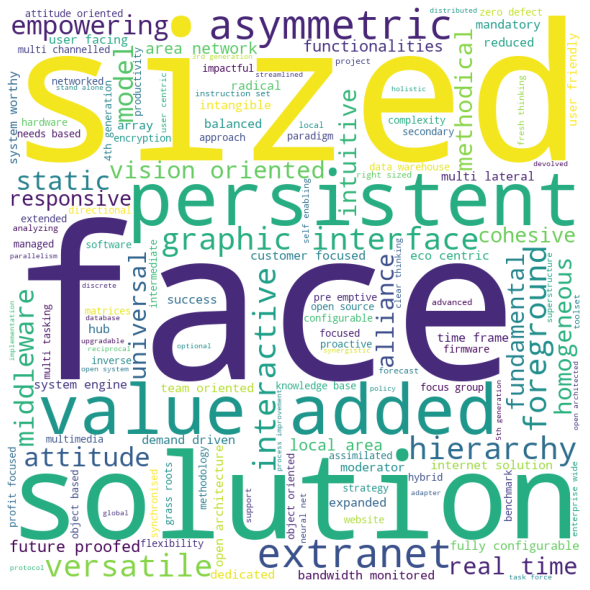

In [67]:
comment_words = ''
for val in car_df.Buzzword:

    val = str(val)

# split the value
    tokens = val.split()
    #print(tokens)
# Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
            background_color ='white',
            min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
